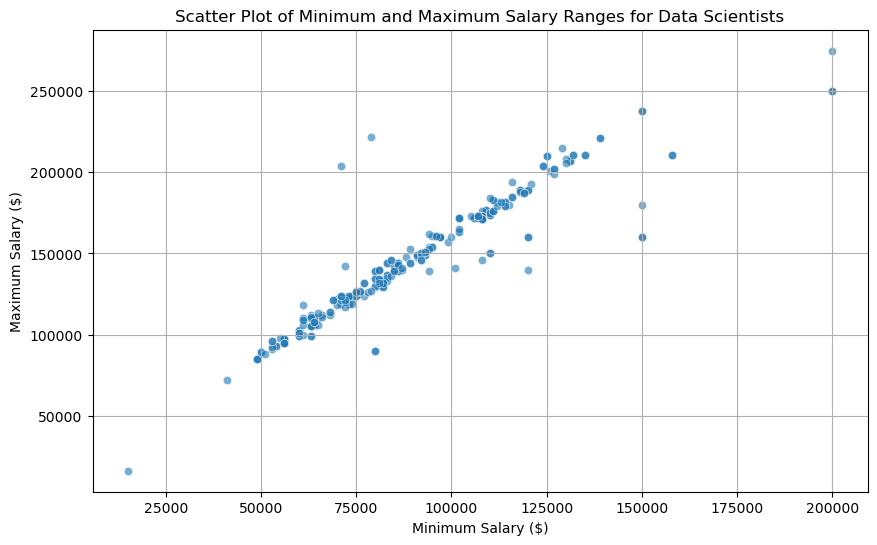

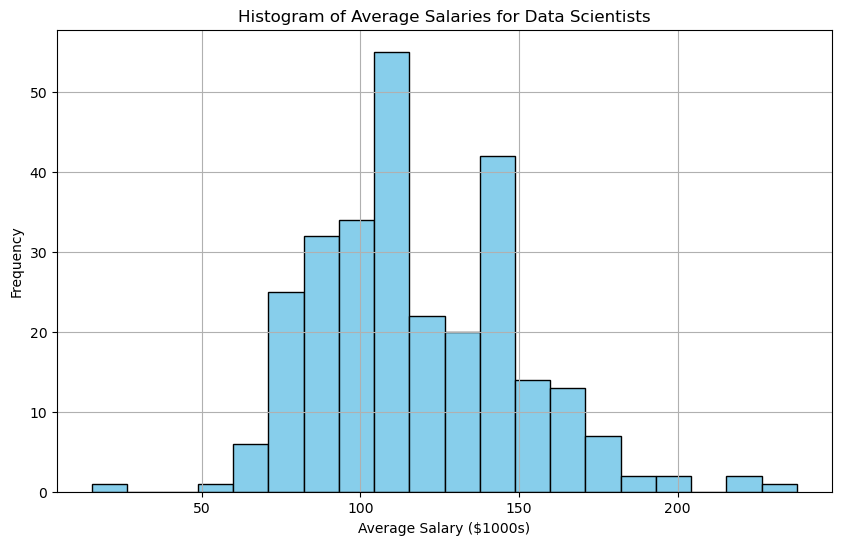

<Figure size 1400x800 with 0 Axes>

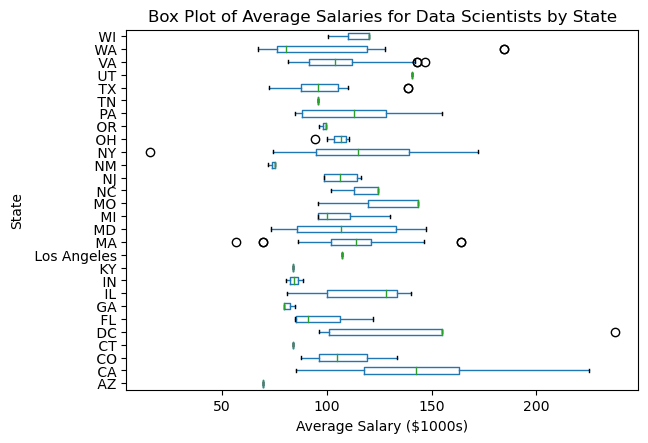

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# Load the dataset
df = pd.read_csv('Glassdoor_Salary_Cleaned_Version.csv')

# Filter for only Data Scientist positions
data_scientist_df = df[df['Job Title'].str.contains("Data Scientist", case=False, na=False)].copy()

# Function to extract min and max salary from the salary estimate
def extract_min_max_salary(salary_estimate):
    expression = r'\$(\d+)K'
    parts = re.split(expression, salary_estimate)
    if len(parts) >= 4:
        min_salary = int(parts[1]) * 1000
        max_salary = int(parts[3]) * 1000
        return min_salary, max_salary
    return np.nan, np.nan ("with help of chatgpt and code from prof")
    


# Add results as new columns
data_scientist_df[['min_salary', 'max_salary']] = data_scientist_df['Salary Estimate'].apply(lambda x: pd.Series(extract_min_max_salary(x)))

# Scatter plot of minimum and maximum salary ranges
plt.figure(figsize=(10, 6))
plt.scatter(data_scientist_df['min_salary'], data_scientist_df['max_salary'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Minimum and Maximum Salary Ranges for Data Scientists')
plt.xlabel('Minimum Salary ($)')
plt.ylabel('Maximum Salary ($)')
plt.grid(True)
plt.show()

# Histogram of average salaries
plt.figure(figsize=(10, 6))
plt.hist(data_scientist_df['avg_salary'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Average Salaries for Data Scientists')
plt.xlabel('Average Salary ($1000s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot of salaries by state
plt.figure(figsize=(14, 8))
data_scientist_df.boxplot(column='avg_salary', by='job_state', grid=False, vert=False)
plt.title('Box Plot of Average Salaries for Data Scientists by State')
plt.suptitle('')  # Suppress the default title to avoid overlap
plt.xlabel('Average Salary ($1000s)')
plt.ylabel('State')
plt.show()


# Analysis

Analysis of the Scatterplot:

The scatterplot shows the relationship between the minimum and maximum salary ranges for Data Scientist positions. 
There is a linear relationship between the minimum and maximum salary ranges as when the minimum salary increases, the maximum salary also tends to increase.
A few points are far away from the general trend, indicating outliers.

Analysis of Histogram:

The histogram shows the distribution of average salaries for Data Scientists.
The majority of average salaries are clustered between $70,000 and $100,000.
The distribution is slightly right-skewed.


Analysis of the Boxplot:

The boxplot shows that the salaries varies widely between states. 
States such as California and New York shows higher median salaries compared to other states, suggesting these regions offer more competitive compensation for Data Scientists.
Where states like Texas and Florida show moderate median salaries, indicating a middle ground in terms of compensation.
Some states show outliers with exceptionally high salaries.
Also, few states displays low salary outliers.